In [8]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)

In [9]:
N = 10000

df = pd.DataFrame({
    "group": np.random.choice(["control", "variant"], N),
})

df["converted"] = np.where(
    df["group"] == "variant",
    np.random.binomial(1, 0.12, N),
    np.random.binomial(1, 0.10, N)
)

df.head()


,group,converted
0,control,0
1,variant,0
2,control,0
3,control,0
4,control,0


In [10]:
summary = df.groupby("group")["converted"].agg(["sum","count"])
summary["rate"] = summary["sum"] / summary["count"]
summary


,sum,count,rate
group,,,
control,537,5013,0.107121
variant,592,4987,0.118709


In [11]:
control = summary.loc["control","rate"]
variant = summary.loc["variant","rate"]

lift = (variant - control) / control
print("Control:", control)
print("Variant:", variant)
print("Lift:", lift)


Control: 0.10712148414123279
Variant: 0.1187086424704231
Lift: 0.10816838864847494


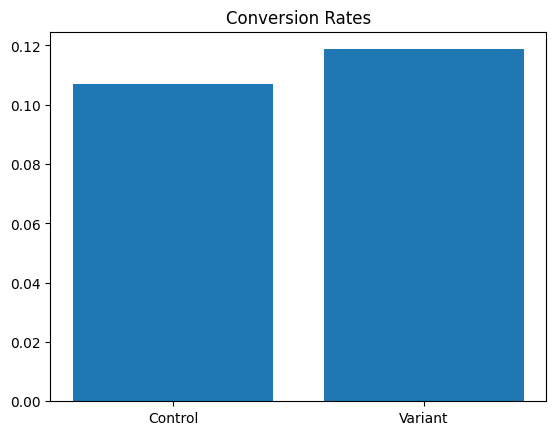

In [12]:
plt.bar(["Control","Variant"], [control, variant])
plt.title("Conversion Rates")
plt.show()
